# COMP 3602 - Lab test
### Student Name:
### Student ID:

# Important Notes:
* Rename this file as "ID.ipynb" where "ID" represents your student ID.
* Do not modify content or order of any cells with ***questions***
* Use the given empty cells to write code and feel free to add extra cells if needed
* When you need to write an answer make sure the cell is ***Markdown***
* Submit the jupyter notebook "ID.ipynb" along with the pdf version of the notebook **"ID.pdf"**

In [131]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [132]:
df = pd.read_csv(r"Rice_Cammeo_Osmancik.csv")
df

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

In [133]:
counts = df['Class'].value_counts()
print(counts)


Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB


In [135]:
print("Rows and Columns:", df.shape)

Rows and Columns: (3810, 9)


**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [136]:
df = df.drop(columns="ID")
df = df.drop(columns="Convex_Area")

**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [137]:
df.isnull().sum()

Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Extent               0
Class                0
dtype: int64

In [138]:
df = df.dropna()

In [139]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Extent               0
Class                0
dtype: int64

**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [140]:
numeric_columns = []
numeric_columns = df.select_dtypes(include="float").columns.tolist()
numeric_columns

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Eccentricity',
 'Extent']

**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [141]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent
count,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000
mean,12666.527617,454.213698,188.768826,86.308672,0.886876,0.661951
std,1732.569669,35.596674,17.447601,5.733079,0.020818,0.077270
min,7551.000000,359.100006,145.264465,59.532406,0.777233,0.497413
25%,11370.500000,426.144752,174.353855,82.723135,0.872437,0.598779
50%,12419.000000,448.843002,185.791550,86.424641,0.889010,0.645390
75%,13949.750000,483.657242,203.520767,90.132666,0.902615,0.726644
max,18913.000000,548.445984,239.010498,107.542450,0.948007,0.861050


**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

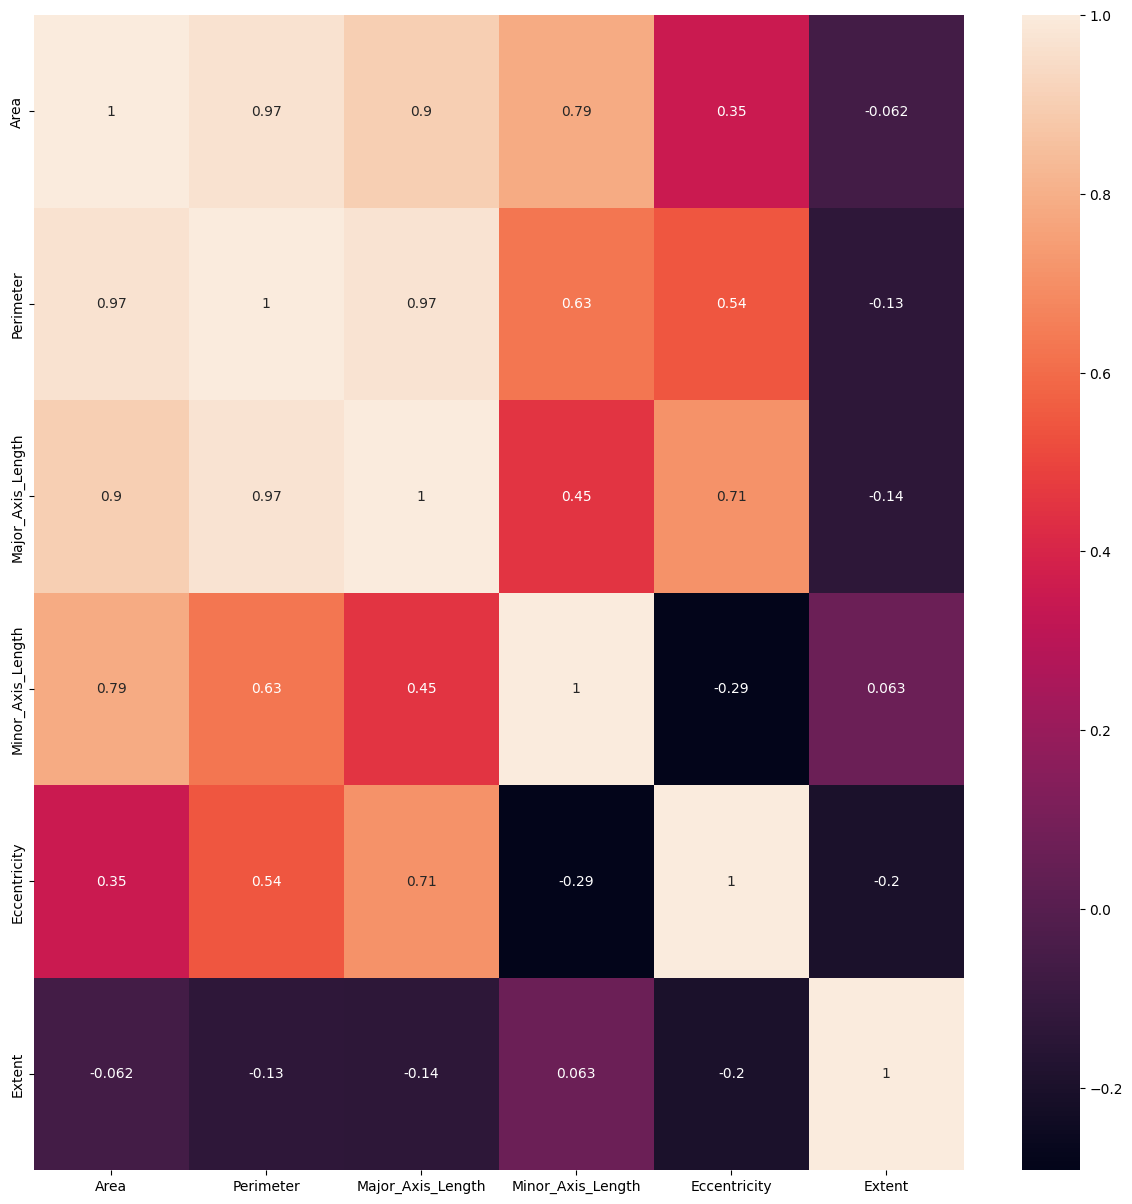

In [142]:
correlation = df.select_dtypes(include='float').corr()
plt.figure(figsize=(15, 15)) 
dataplot = sns.heatmap(correlation, annot=True)
plt.show()

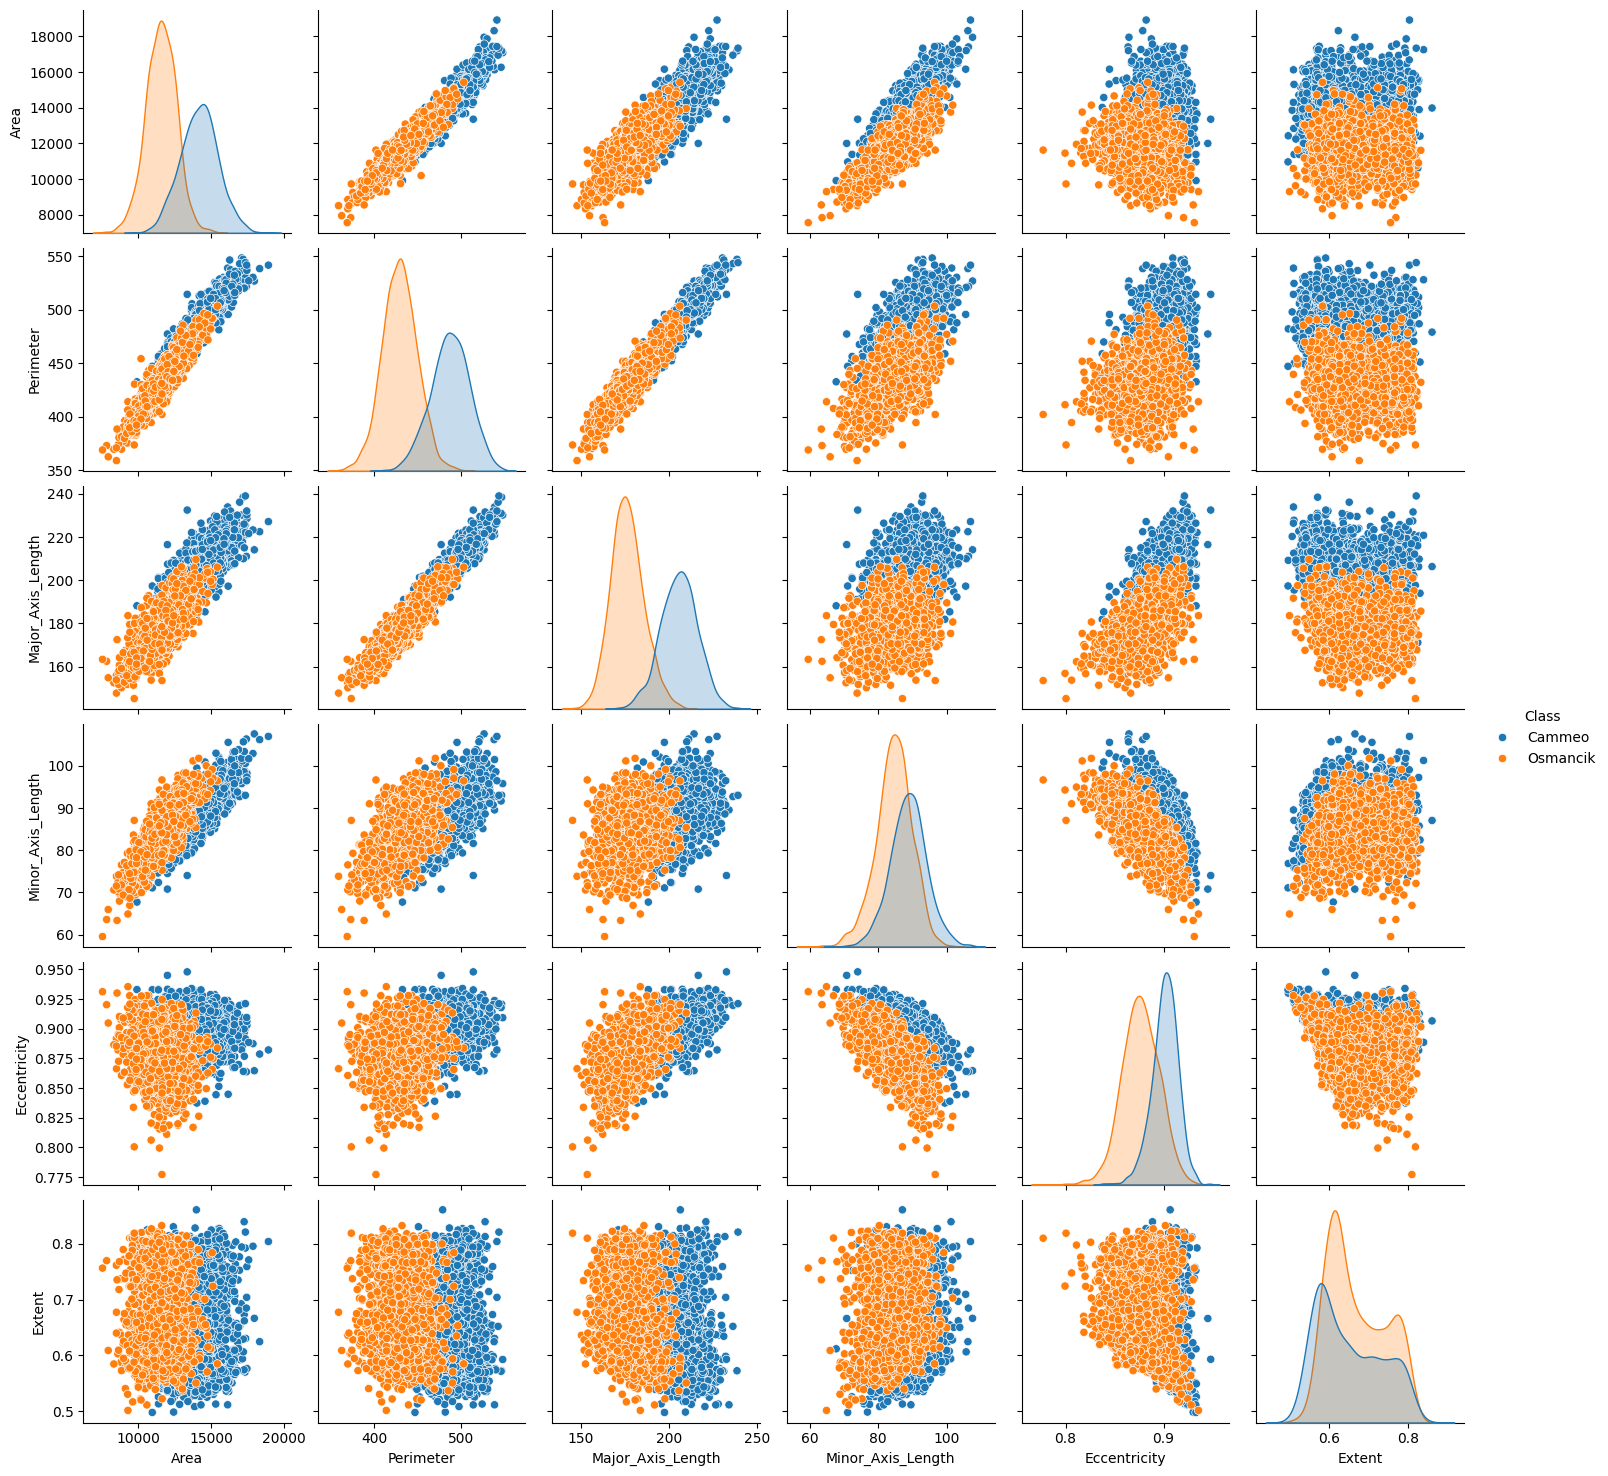

In [143]:
sns.pairplot(df, hue='Class')

**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

(array([  7.,  37., 150., 304., 421., 419., 194.,  72.,  19.,   2.]),
 array([ 9908. , 10808.5, 11709. , 12609.5, 13510. , 14410.5, 15311. ,
        16211.5, 17112. , 18012.5, 18913. ]),
 <BarContainer object of 10 artists>)

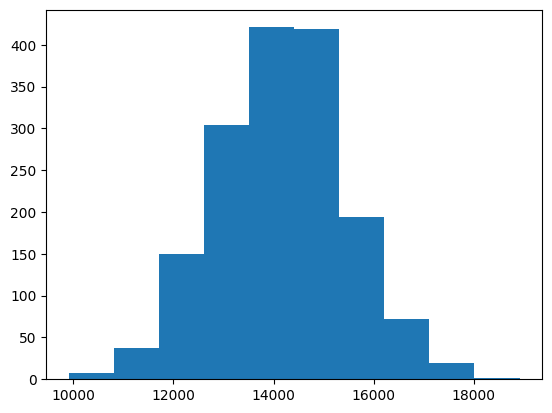

In [144]:
Cammeo_df = df[df['Class'] == 'Cammeo']['Area']
plt.hist(Cammeo_df)

(array([  4.,  25., 101., 313., 577., 616., 409., 104.,  19.,   9.]),
 array([ 7551. ,  8337.9,  9124.8,  9911.7, 10698.6, 11485.5, 12272.4,
        13059.3, 13846.2, 14633.1, 15420. ]),
 <BarContainer object of 10 artists>)

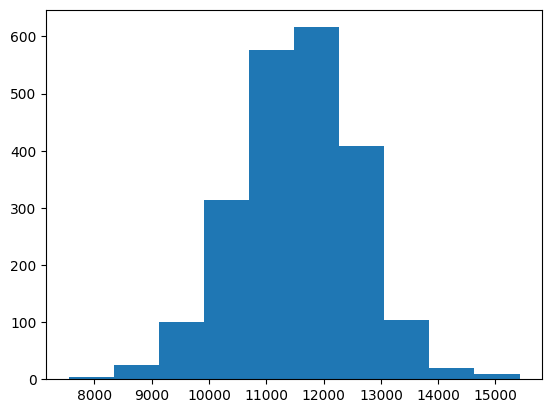

In [145]:
Osmancik_df = df[df['Class'] == 'Osmancik']['Area']
plt.hist(Osmancik_df)

In [146]:
# From the graphs above, the histograms seem to be very similar in terms of shape, distrbtuion a spread.

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

<Axes: >

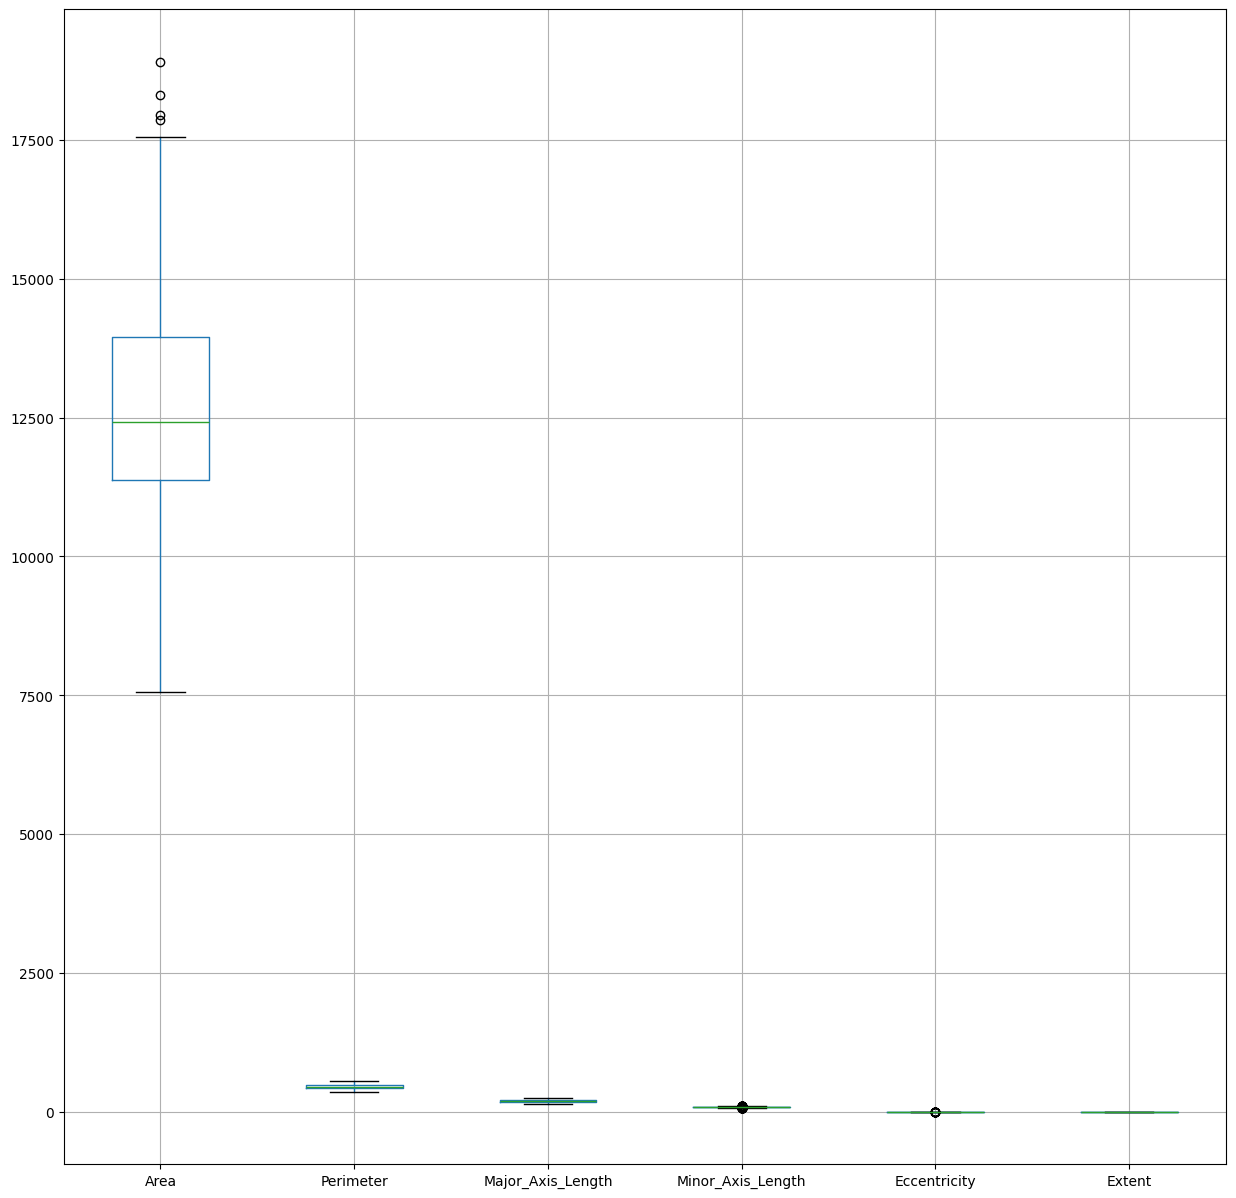

In [147]:
df.boxplot(figsize=(15,15))

In [148]:
scaler = MinMaxScaler()
columns = df.select_dtypes(include="float").columns
scaled = scaler.fit_transform(df[columns])

<Axes: >

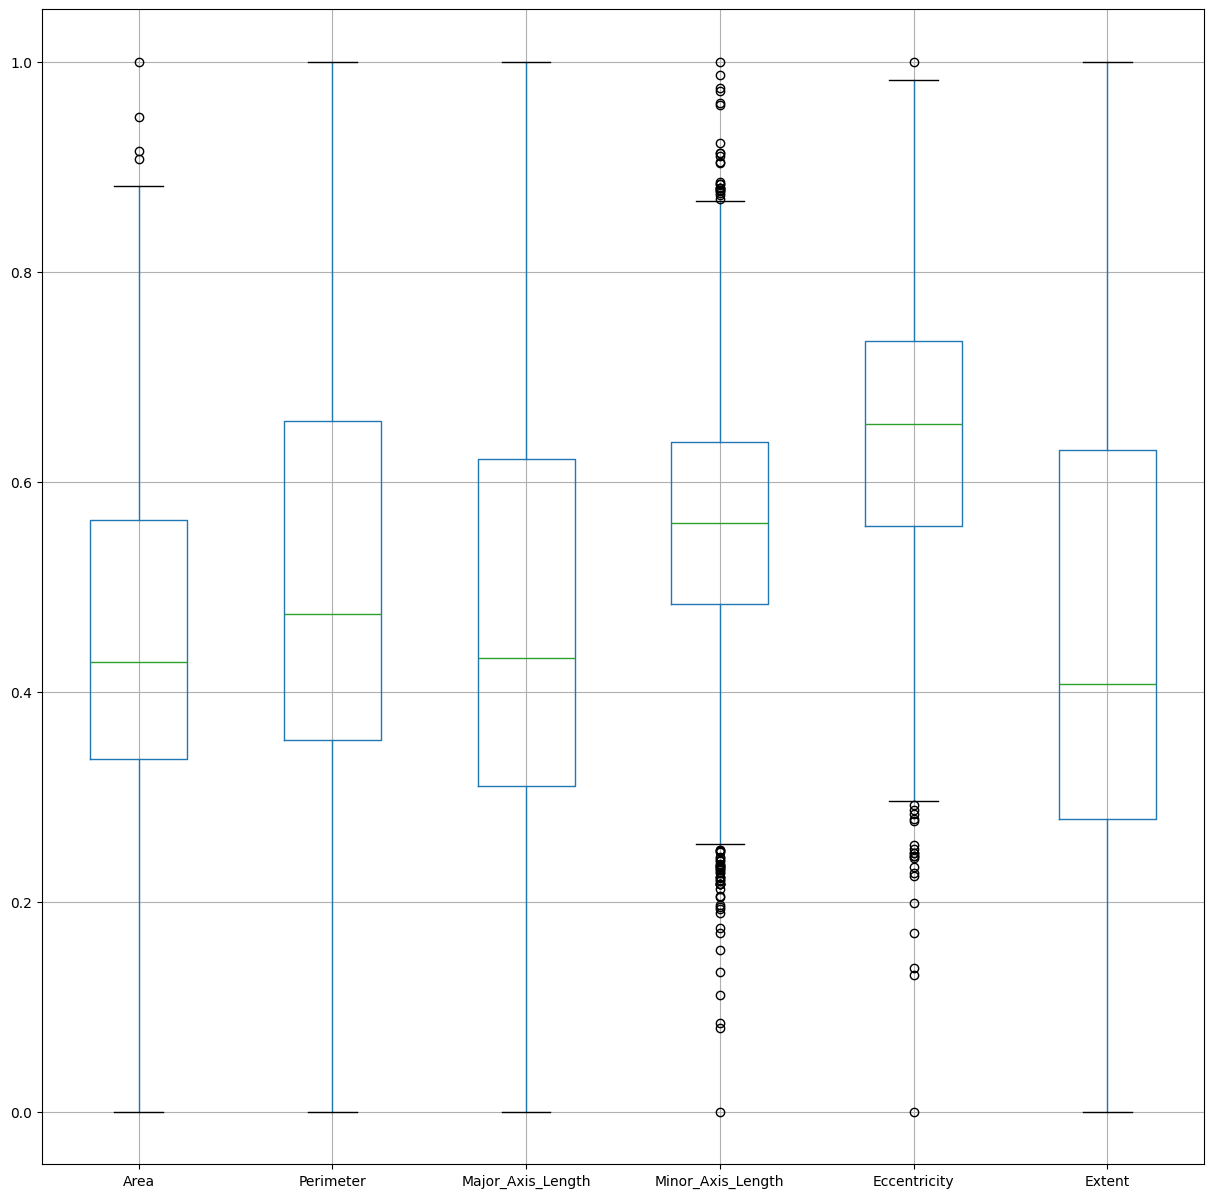

In [149]:
scaled_df = pd.DataFrame(scaled, columns=columns)
scaled_df.boxplot(figsize=(15,15))

**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [150]:
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [151]:
X = scaler.fit_transform(df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Extent']])  # Scale features
encoder = LabelEncoder()
y = encoder.fit_transform(df['Class'])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [153]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [154]:
y_pred = knn.predict(X_test)

In [155]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8939526730937774


In [156]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       488
           1       0.91      0.91      0.91       653

    accuracy                           0.89      1141
   macro avg       0.89      0.89      0.89      1141
weighted avg       0.89      0.89      0.89      1141



In [157]:
# Conclusion

## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)